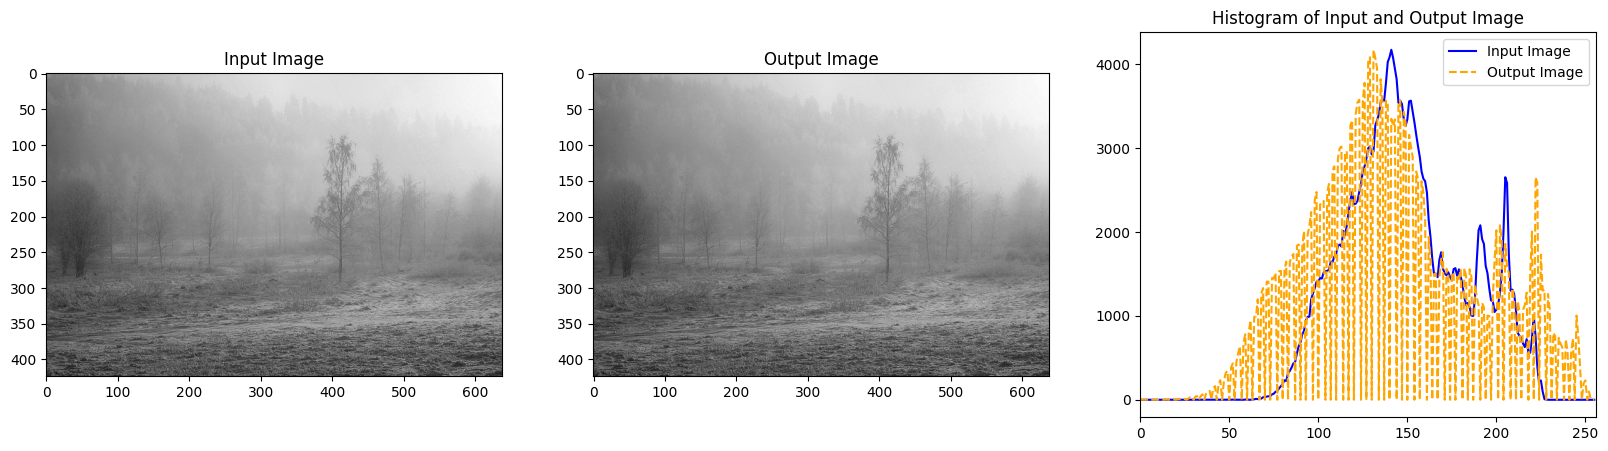

In [1]:
# Q1: Contrast Stretching
#! 灰度后对比度拉伸
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取输入图像
I = cv2.imread("Landscape.png", cv2.IMREAD_GRAYSCALE)

def Contrast_Stretching(I):
    a = 0
    b = 255
    c = np.min(I)
    d = np.max(I)
    return ((I - c) * ((b - a) / (d - c))) + a

O = Contrast_Stretching(I)

# 对比度拉伸前的直方图
hist_I = cv2.calcHist([I], [0], None, [256], [0, 256])

# 对比度拉伸后的直方图
hist_O = np.bincount(O.flatten().astype('int'), minlength=256)

# 显示对比度拉伸前后的图像
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(I, cmap='gray')
axs[0].set_title('Input Image')
axs[1].imshow(O, cmap='gray')
axs[1].set_title('Output Image')

# 显示对比度拉伸前后的直方图
axs[2].plot(hist_I, label='Input Image', color='blue')
axs[2].plot(hist_O, label='Output Image', linestyle='--', color='orange')
axs[2].set_xlim([0, 256])
axs[2].set_title('Histogram of Input and Output Image')
axs[2].legend()
plt.show()


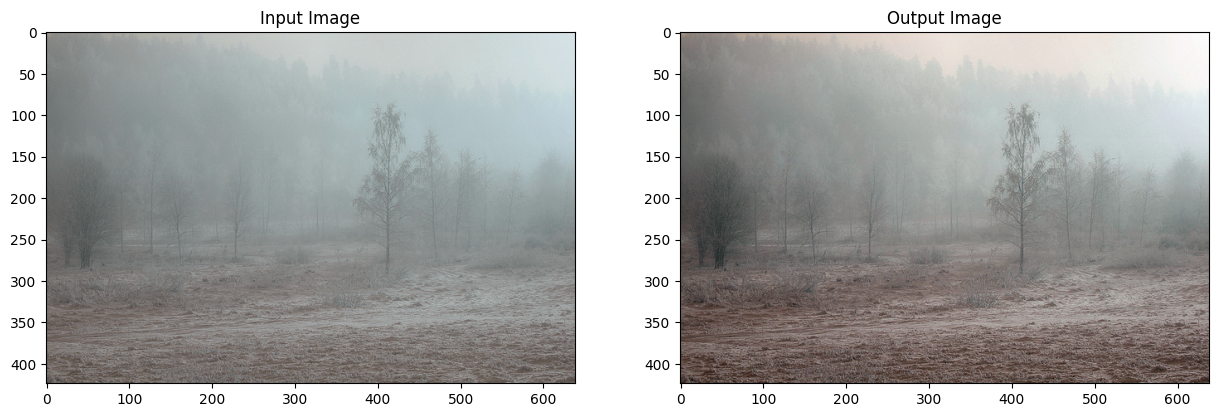

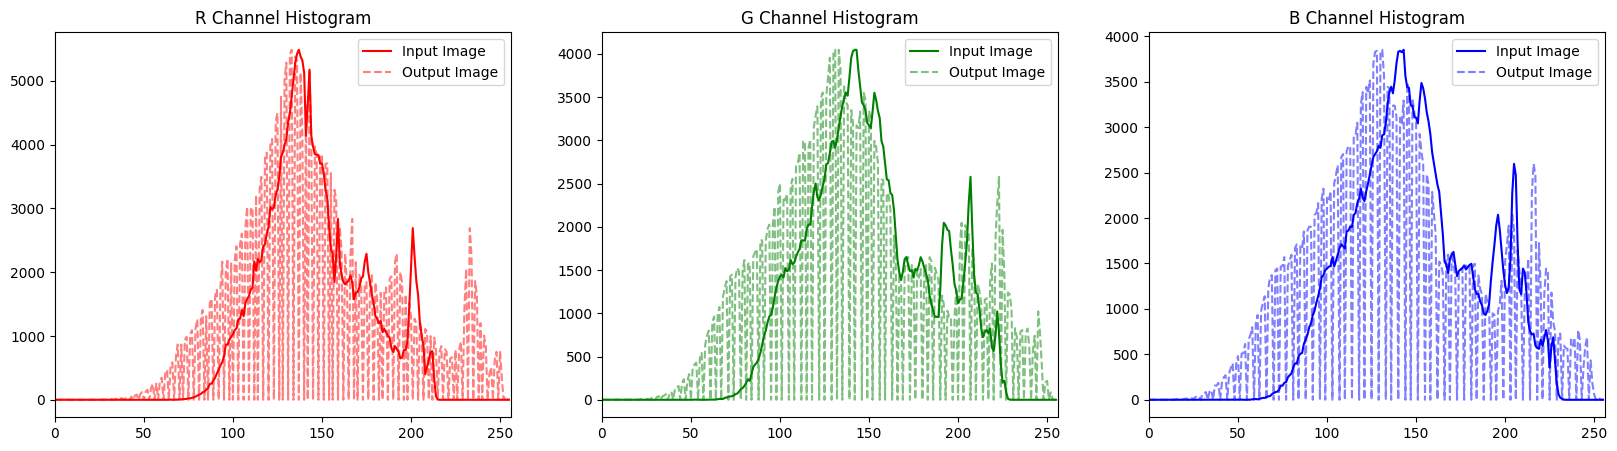

In [2]:
# Q1: Contrast Stretching
#! 分别对RGB三个通道进行对比度拉伸, 再合并

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取输入图像
I = cv2.imread("Landscape.png", cv2.IMREAD_COLOR)

# 定义对比度拉伸函数
def Contrast_Stretching(I):
    a = 0
    b = 255
    c = np.min(I)
    d = np.max(I)
    return ((I - c) * ((b - a) / (d - c))) + a

# 将RGB图像分离成三个通道
R, G, B = cv2.split(I)

# 对每个通道应用对比度拉伸
R_stretched = Contrast_Stretching(R)
G_stretched = Contrast_Stretching(G)
B_stretched = Contrast_Stretching(B)

# 将三个通道合并成RGB图像
O = cv2.merge((R_stretched, G_stretched, B_stretched))

# 将输出图像归一化到[0, 255]范围
O_norm = cv2.normalize(O, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# 对比度拉伸前的直方图
hist_I = [cv2.calcHist([I], [i], None, [256], [0, 256]) for i in range(3)]

# 对比度拉伸后的直方图
hist_O = [np.bincount(O[:,:,i].flatten().astype('int'), minlength=256) for i in range(3)]

fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# 显示对比度拉伸前后的图像
axs[0].imshow(I)
axs[0].set_title('Input Image')
axs[1].imshow(O_norm)
axs[1].set_title('Output Image')


fig2, axs2 = plt.subplots(1, 3, figsize=(20, 5))

# 显示对比度拉伸前后的直方图
for i, color in enumerate(['r', 'g', 'b']):
    axs2[i].plot(hist_I[i], color=color, label='Input Image')
    axs2[i].plot(hist_O[i], color=color, alpha=0.5, linestyle='--', label='Output Image')
    axs2[i].set_xlim([0, 256])
    axs2[i].set_title(f'{color.upper()} Channel Histogram')
    axs2[i].legend()

plt.show()


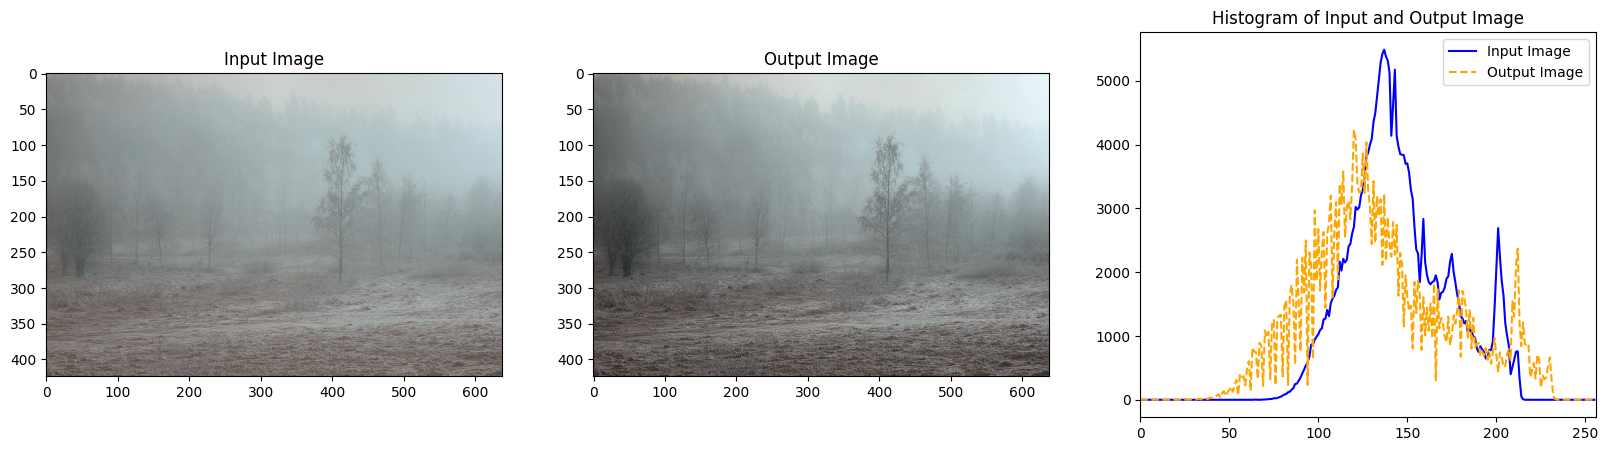

In [3]:
# Q1: Contrast Stretching 
#! 转换到HSV颜色空间，对亮度通道进行对比度拉伸，再转换回BGR颜色空间
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取输入图像
I = cv2.imread("Landscape.png", cv2.IMREAD_COLOR)

def Contrast_Stretching(I):
    # 将图像转换到HSV颜色空间
    hsv = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)
    
    # 获取亮度通道
    v = hsv[:,:,2]
    
    # 计算映射函数
    a = 0
    b = 255
    c = np.min(v)
    d = np.max(v)
    mapping = ((v - c) * ((b - a) / (d - c))) + a
    
    # 将映射函数应用到亮度通道
    hsv[:,:,2] = mapping
    
    # 将图像转换回BGR颜色空间
    O = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    return O

# 对比度拉伸前的直方图
hist_I = cv2.calcHist([I], [0], None, [256], [0, 256])

# 对比度拉伸后的直方图
O = Contrast_Stretching(I)
hist_O = cv2.calcHist([O], [0], None, [256], [0, 256])

# 显示对比度拉伸前后的图像和直方图
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# 显示对比度拉伸前后的图像
axs[0].imshow(I)
axs[0].set_title('Input Image')
axs[1].imshow(O)
axs[1].set_title('Output Image')

# 显示对比度拉伸前后的直方图
axs[2].plot(hist_I, color='blue')
axs[2].plot(hist_O, color='orange', linestyle='--')
axs[2].set_xlim([0, 256])
axs[2].set_title('Histogram of Input and Output Image')
axs[2].legend(['Input Image', 'Output Image'])


plt.show()


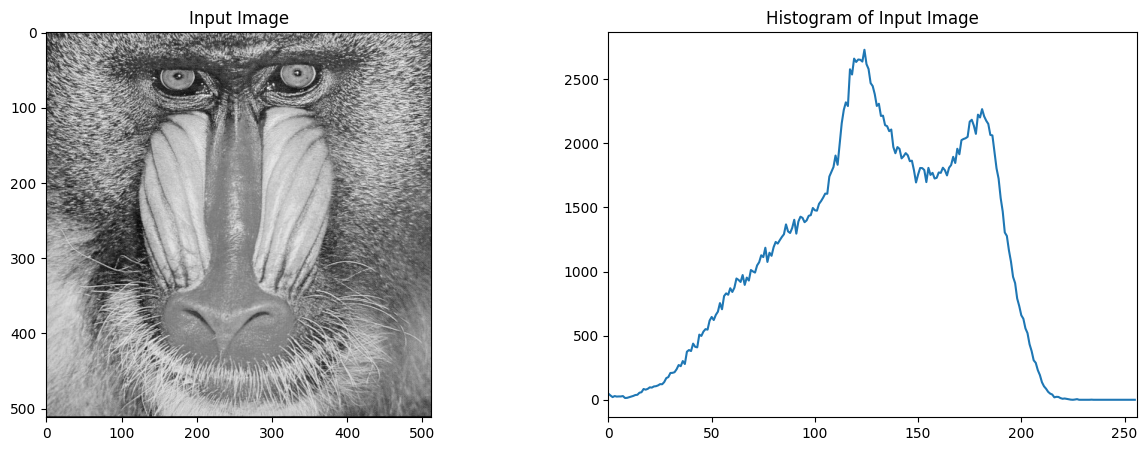

In [4]:
# Q2: Histogram Calculation 计算直方图 （库函数）
import cv2
import numpy as np
from matplotlib import pyplot as plt

I = cv2.imread("Baboon.png", cv2.IMREAD_GRAYSCALE)

# 计算直方图
hist = cv2.calcHist([I], [0], None, [256], [0, 256])

# 绘制直方图
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(I, cmap='gray')
axs[0].set_title('Input Image')
axs[1].plot(hist)
axs[1].set_xlim([0, 256])
axs[1].set_title('Histogram of Input Image')
plt.show()


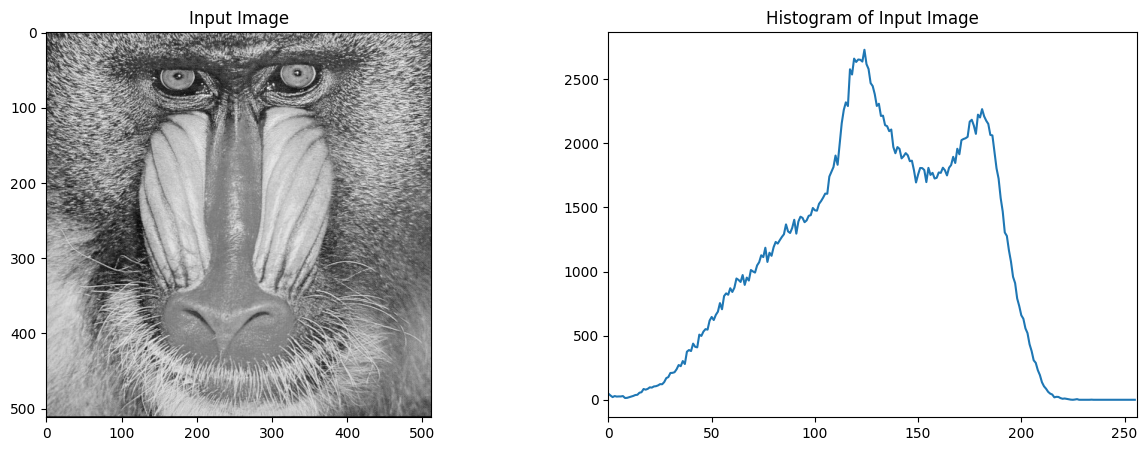

In [1]:
# Q2: Histogram Calculation 计算直方图 （自行实现）
import cv2
import numpy as np
from matplotlib import pyplot as plt

I = cv2.imread("Baboon.png", cv2.IMREAD_GRAYSCALE)

# 计算直方图
hist = np.zeros(256, dtype=np.int32)
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        hist[I[i,j]] += 1

# 绘制直方图
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(I, cmap='gray')
axs[0].set_title('Input Image')
axs[1].plot(hist)
axs[1].set_xlim([0, 256])
axs[1].set_title('Histogram of Input Image')
plt.show()


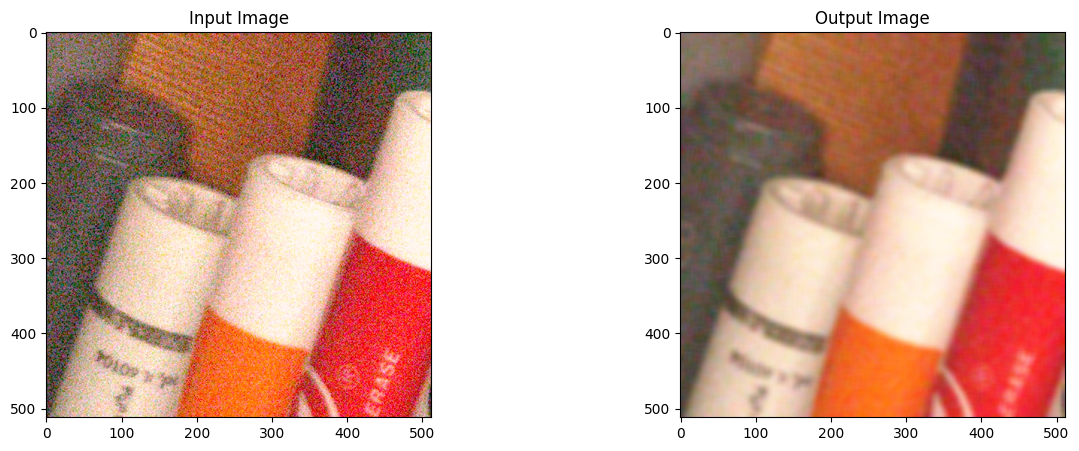

In [6]:
# Image Smoothing 图像平滑 - 平均 (均匀) 滤波器 - 库函数

import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取输入图像
I = cv2.imread("Noisy.png", cv2.IMREAD_COLOR)

# 将BGR格式的图像转换为RGB格式
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# 定义平均滤波器的大小
kernel_size = (10, 10)

# 应用平均滤波器
O = cv2.blur(I, kernel_size)

# 显示输入和输出图像
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(I)
axs[0].set_title('Input Image')
axs[1].imshow(O)
axs[1].set_title('Output Image')

plt.show()


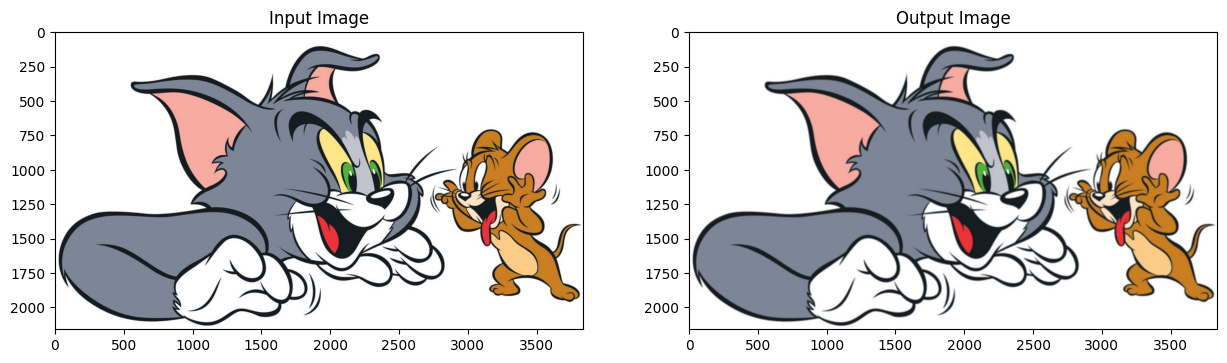

In [5]:
# Image Smoothing 图像平滑 - 平均 (均匀) 滤波器 -  自行实现

import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取输入图像
I = cv2.imread("w.jpg", cv2.IMREAD_COLOR)

# 将BGR格式的图像转换为RGB格式
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# 定义平均滤波器的大小
kernel_size = (10, 10)

# 自行实现平均滤波器
kernel = np.ones(kernel_size, np.float32) / (kernel_size[0] * kernel_size[1])
O = cv2.filter2D(I, -1, kernel)

# 显示输入和输出图像
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(I)
axs[0].set_title('Input Image')
axs[1].imshow(O)
axs[1].set_title('Output Image')

plt.show()

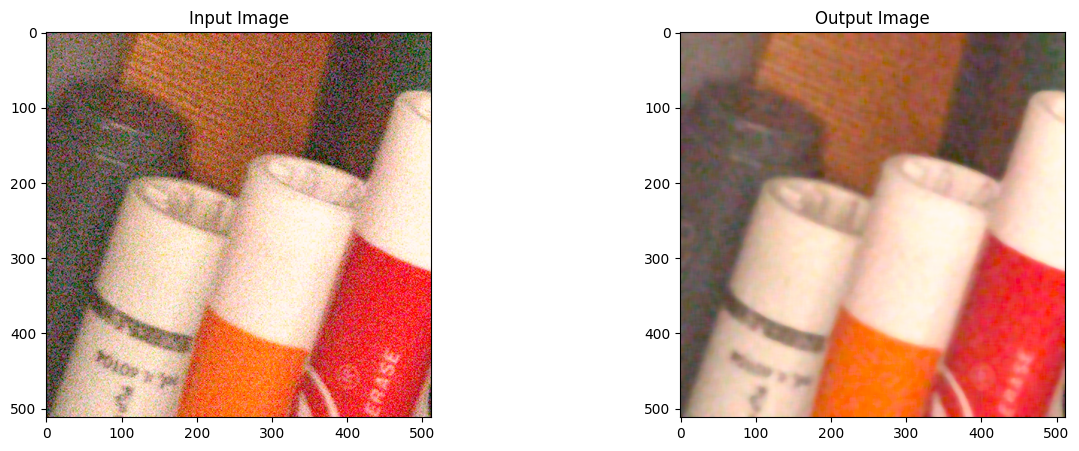

In [8]:
# Image Smoothing 图像平滑 - 中值滤波器 - 库函数

import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取输入图像
I = cv2.imread("Noisy.png", cv2.IMREAD_COLOR)

# 将BGR格式的图像转换为RGB格式
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# 定义中值滤波器的大小
kernel_size = 9

# 应用中值滤波器
O = cv2.medianBlur(I, kernel_size)

# 显示输入和输出图像
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(I)
axs[0].set_title('Input Image')
axs[1].imshow(O)
axs[1].set_title('Output Image')

plt.show()


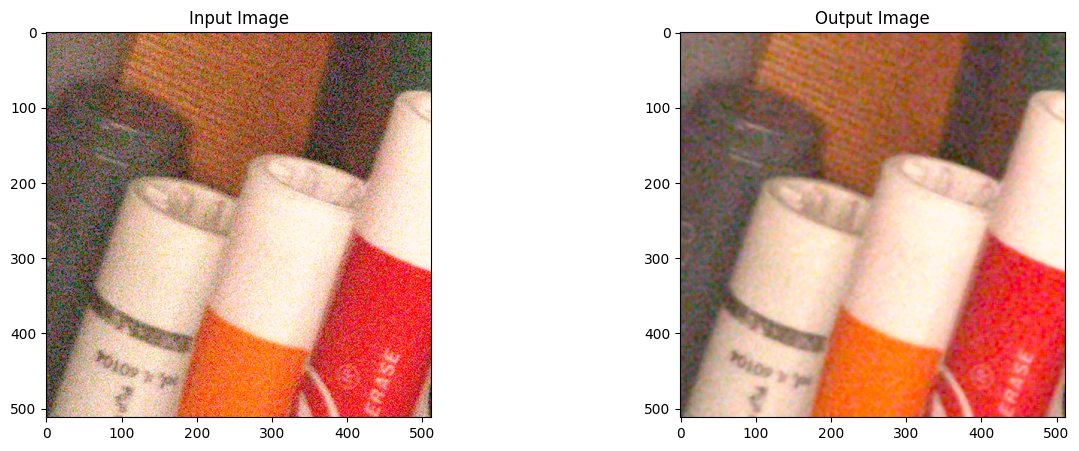

In [9]:
# Image Smoothing 图像平滑 - 中值滤波器 - 自行实现

import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取输入图像
I = cv2.imread("Noisy.png", cv2.IMREAD_COLOR)

# 将BGR格式的图像转换为RGB格式
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# 定义中值滤波器的大小
kernel_size = 5

# 自行实现中值滤波器
O = np.zeros_like(I)
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        for k in range(I.shape[2]):
            # 获取当前像素点周围的像素值
            values = []
            for x in range(
                max(0, i - kernel_size // 2), min(I.shape[0], i + kernel_size // 2 + 1)
            ):
                for y in range(
                    max(0, j - kernel_size // 2),
                    min(I.shape[1], j + kernel_size // 2 + 1),
                ):
                    values.append(I[x, y, k])
            # 计算中值
            O[i, j, k] = np.median(values)

# 显示输入和输出图像
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(I)
axs[0].set_title("Input Image")
axs[1].imshow(O)
axs[1].set_title("Output Image")

plt.show()

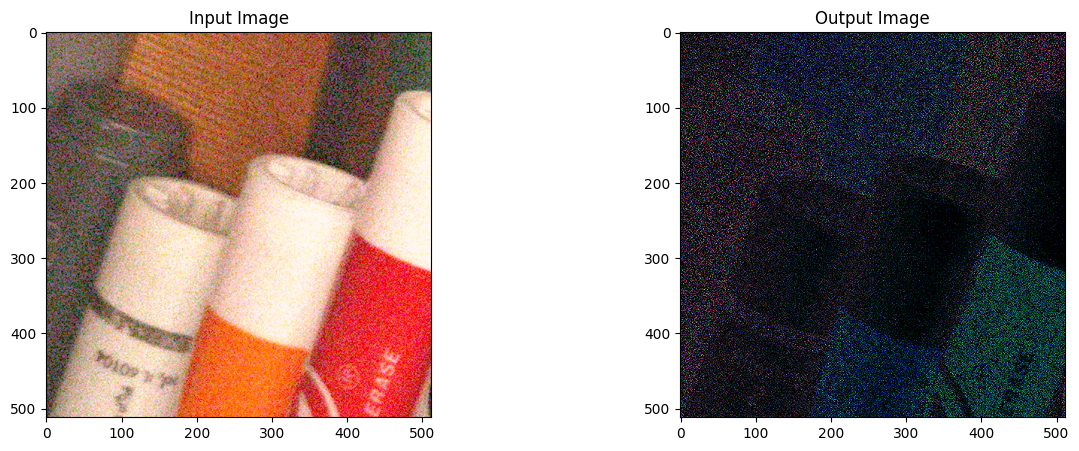

In [10]:
# Q4 Edge Detection 边缘检测 - Laplacian operator

import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取输入图像
I = cv2.imread("Noisy.png", cv2.IMREAD_COLOR)

# 将BGR格式的图像转换为RGB格式
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# 定义拉普拉斯算子
laplacian_kernel = np.array(
    [
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0],
    ],
    dtype=np.float32,
)

# 应用拉普拉斯算子
O = cv2.filter2D(I, -1, laplacian_kernel)

# 显示输入和输出图像
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(I)
axs[0].set_title('Input Image')
axs[1].imshow(O, cmap='gray')
axs[1].set_title('Output Image')

plt.show()
